<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/Sample_TensorFlow%2BFashionMNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)


1.15.0


In [6]:
import keras

Using TensorFlow backend.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_teacher_labels), (test_data, test_teacher_labels) = fashion_mnist.load_data()

In [12]:
fashion_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_data.shape)
len(train_teacher_labels)

(60000, 28, 28)


60000

In [16]:
print(test_data.shape)
len(test_teacher_labels)

(10000, 28, 28)


10000

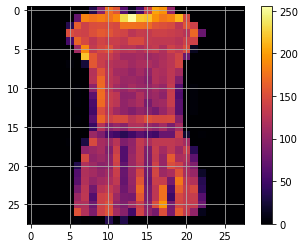

In [17]:
# 画像データの描画
plt.figure()
plt.imshow(train_data[3], cmap='inferno')
plt.colorbar()
plt.grid()

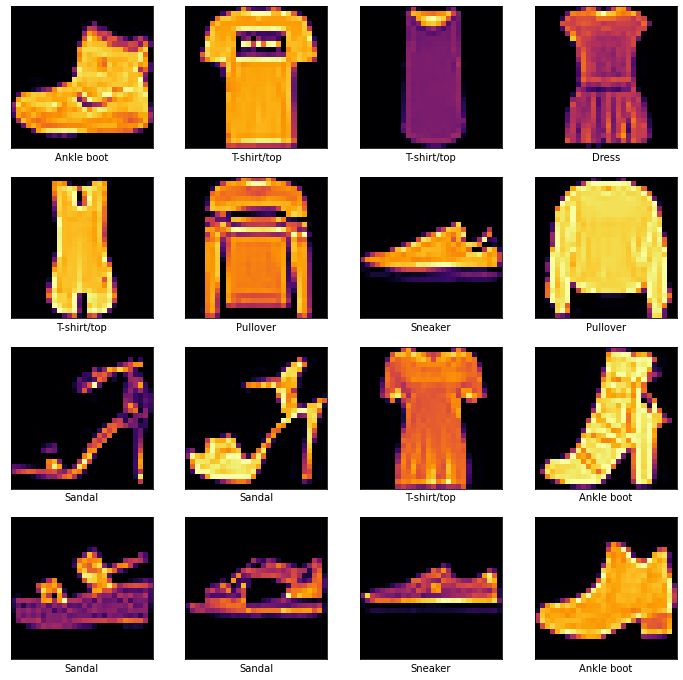

In [18]:
plt.figure(figsize=(12, 12))
for i in range(16) :
  plt.subplot(4, 4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i], cmap='inferno')
  plt.xlabel(fashion_names[train_teacher_labels[i]])

In [0]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 20

IMG_ROWS, IMG_COLS = 28, 28

In [0]:
# 学習モデルに合わせて、データ調整
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

In [21]:
print('学習データ　train_data shape : ', train_data.shape)
print(train_data.shape[0], 'サンプルを学習します')
print('検証データ　test_data shape : ', test_data.shape)
print(test_data.shape[0], 'サンプルを検証します')

学習データ　train_data shape :  (60000, 28, 28)
60000 サンプルを学習します
検証データ　test_data shape :  (10000, 28, 28)
10000 サンプルを検証します


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam


### 入力層
画像１枚は、28×28ピクセル。この２次元配列を784(28×28)１次元配列に変換。<br>
入力層のニューロンを784個定義

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(IMG_ROWS, IMG_COLS)))

### 中間層
今回は、ニューロン数を128個定義。<br>
※ここは、何個でもOK（64個でも、2000個でも...）<br>
必要に応じて、中間層の数を増やしてもOK<br>
階層の数、中間層のニューロン数などは、学習時間、学習効率、学習結果に影響する。

In [0]:
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(200, activation=tf.nn.relu))

### 出力層
ここのニューロン数は、実際に分類したいクラスの数に合わせるのが一般的。<br>
今回は、10種類なので、10とする。

In [0]:
model.add(Dense(10, activation=tf.nn.softmax))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               25800     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 130,988
Trainable params: 130,988
Non-trainable params: 0
________________________________________________

In [32]:
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
# 学習の誤差と正解率グラフを描画する関数
def plot_loss_accuracy_graph(fit_record) :
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title("LOSS")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc='upper right')
  plt.show()

  plt.plot(fit_record.history['acc'], "-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_acc'], "-o", color="black", label="val_laccuracy", linewidth=2)
  plt.title("ACCURACY")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc='lower right')
  plt.show()


In [34]:
# 学習
print('反復学習回数 : ', EPOCHS)
fit_record = model.fit(
    train_data,
    train_teacher_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(test_data, test_teacher_labels)
)

反復学習回数 :  20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20




60000/60000 [==============================] - 11s 180us/step - loss: 0.8817 - acc: 0.6565 - val_loss: 0.5568 - val_acc: 0.7846
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.4796 - acc: 0.8263 - val_loss: 0.4783 - val_acc: 0.8357
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.4005 - acc: 0.8582 - val_loss: 0.4041 - val_acc: 0.8574
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.3586 - acc: 0.8734 - val_loss: 0.3909 - val_acc: 0.8598
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3349 - acc: 0.8802 - val_loss: 0.4080 - val_acc: 0.8526
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3183 - acc: 0.8852 - val_loss: 0.3608 - val_acc: 0.8734
Epoch 7/20
600

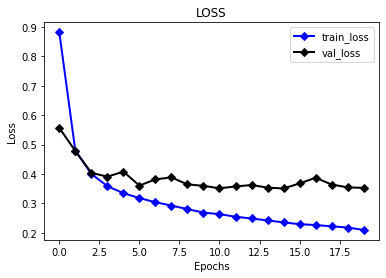

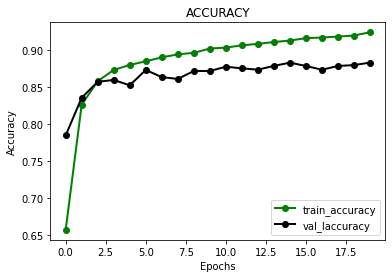

In [35]:
plot_loss_accuracy_graph(fit_record)

In [36]:
result_score = model.evaluate(test_data, test_teacher_labels)

print('検証誤差 : ', result_score[0])
print('検証正解率 : ', result_score[1])

10000/10000 [==============================] - 0s 46us/step
検証誤差 :  0.3527995813250542
検証正解率 :  0.8834


In [39]:
data_location = 4
img = test_data[data_location]
print(img.shape)

img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [40]:
# 予測
predictions_result_array = model.predict(img)
print(predictions_result_array)

[[1.8047799e-01 7.3326657e-05 3.0061191e-02 2.9220367e-03 3.4264538e-03
  3.0453120e-07 7.8276330e-01 3.6482669e-07 2.7486865e-04 1.7580697e-07]]


In [41]:
number = np.argmax(predictions_result_array[0])
print('予測結果 : ', fashion_names[number])

予測結果 :  Shirt


In [0]:
# 学習モデルの保存
model.save('keras-fashion-mnist-model.h5')